# Case Study 1
## Analysis of Loans made through the Lending Club platform
https://www.openintro.org/data/index.php?data=loans_full_schema is the link to the data source

### Here we import the necessary libraries for Data processing and Data visualization

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings 
warnings.filterwarnings('ignore')

In [273]:
df = pd.read_csv('loans_full_schema.csv')

In [274]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [275]:
missing_vals = df.isnull().sum(axis=0)*100/len(df)
missing_vals.sort_values(ascending=False)[:10]

verification_income_joint           85.45
debt_to_income_joint                85.05
annual_income_joint                 85.05
months_since_90d_late               77.15
months_since_last_delinq            56.58
months_since_last_credit_inquiry    12.71
emp_title                            8.33
emp_length                           8.17
num_accounts_120d_past_due           3.18
debt_to_income                       0.24
dtype: float64

The records above show that the columns of first 5 columns have a NaN/Null value for more than 50% of the data and thus extraction of information out of these columns will be of very less value, also the 6th column which says that it has more than 10% of missing values and around 1300 values missing out of 10000 values also can pollute the interpretation, modeling and prediction from this data and thus lead the data to wrong conclusions thus we can drop these columns and reduce the unimportant data from the dataset

In [276]:
df.drop(columns = ['verification_income_joint','debt_to_income_joint','annual_income_joint','months_since_90d_late','months_since_last_delinq','months_since_last_credit_inquiry'],inplace=True)

In [277]:
print(df['emp_length'].median())
print(df['emp_length'].mean())
df['emp_length'].fillna(df['emp_length'].median(),inplace=True)

6.0
5.930306000217794


Here for the variable emp_length we can see that the mean and median are almost the same and thus we can replace the NaN/Null/missing values from that data by any one of them, here we are replacing it by median

In [278]:
print(df['debt_to_income'].median())
print(df['debt_to_income'].mean())
df['debt_to_income'].fillna(df['debt_to_income'].mean(),inplace=True)

17.57
19.30819165998396


Here for the variable debt_to_income we can see that the mean and median are very close as well and thus we can replace the NaN/Null/missing values from that data by any one of them, here we are replacing it by the mean

### Now for all columns let us check the number of 0 values that are present in it

In [279]:
p = df.isin([0]).sum(axis=0).sort_values(ascending = False)
p

current_accounts_delinq         9999
num_accounts_30d_past_due       9999
paid_late_fees                  9948
num_collections_last_12m        9873
tax_liens                       9754
num_accounts_120d_past_due      9682
public_record_bankrupt          8785
total_collection_amount_ever    8635
num_historical_failed_to_pay    8586
delinq_2y                       8576
num_mort_accounts               4484
inquiries_last_12m              3060
current_installment_accounts    1414
emp_length                       690
accounts_opened_24m              527
balance                          455
num_active_debit_accounts        333
total_debit_limit                135
num_cc_carrying_balance          125
debt_to_income                    28
total_credit_utilized             28
annual_income                     23
paid_interest                     18
paid_principal                    15
paid_total                        15
num_open_cc_accounts               7
open_credit_lines                  2
n

Here we can start off by dropping all the columns which have more than 80% of their data filled with zero since this will make data highly biased and it does not provide any significant information

In [280]:
cols_to_remove = pd.DataFrame(p).reset_index()['index'][:10]

In [281]:
df.drop(columns = cols_to_remove,inplace=True)

In [282]:
df['emp_title'].nunique()

4741

we drop the emp_title column as well as the unique values for this categorical column is 4741 and it will not contribute to the prdictions as there is no observable pattern for this column 

We will drop subgrade because too many detailed values can lead to overfitting of model, here grade can be consideered as a sufficient indicator for a loan case.we can also drop the issue_month as it is just spread over 3 months and will not contribute to the predcictions 

In [283]:
df.drop(columns = ['issue_month','sub_grade','emp_title'],inplace=True)

In [284]:
def to_obj(colname):
    df[colname] = df[colname].astype(object)

In [285]:
print('earliest_credit_line:',df['earliest_credit_line'].nunique(),'\n'
'term:',df['term'].nunique(),'\n'
'num_mort_accounts:',df['num_mort_accounts'].nunique(),'\n'
'emp_length:',df['emp_length'].nunique())

earliest_credit_line: 53 
term: 2 
num_mort_accounts: 15 
emp_length: 11


These are the columns which are numeric in the dataset but have only limited values and thus can be considered as a categorcial variable

In [286]:
to_obj('term')
to_obj('num_mort_accounts')
to_obj('emp_length')
to_obj('earliest_credit_line')
to_obj('emp_length')

In [287]:
df.corr()['interest_rate'].sort_values(key=abs,ascending=False).reset_index()

,index,interest_rate
0,interest_rate,1.000000
1,paid_interest,0.514508
2,total_debit_limit,-0.254225
3,debt_to_income,0.141393
4,inquiries_last_12m,0.131193
5,total_credit_limit,-0.130497
6,account_never_delinq_percent,-0.124702
7,accounts_opened_24m,0.120657
8,annual_income,-0.099584
9,installment,0.098811


The above table is the correlation of of all the remaining columns of numeric type to the target variable that is the interest rate

In [288]:
df.drop(columns = 'paid_principal',inplace = True) #least corr

We can the column 'paid_principal' as it has the least correlation and of the order that is much less than the other columns

In [289]:
viz_continuous = df.corr()['interest_rate'].sort_values(key=abs,ascending=False).reset_index()

In [290]:
viz_continuous.columns = ['Colname','interest_rate']


In [291]:

def pair_p(s,e):
    cols_to_select = viz_continuous[s:e]['Colname']
    pair_plt1 = df[cols_to_select]
    pair_plt1 = pd.concat([pair_plt1,df['interest_rate']],axis =1 )
    return sns.pairplot(pair_plt1,x_vars = pair_plt1.columns[:-1],y_vars=['interest_rate'])

Let us plot the target variable of interest_rate with all other continuous variables

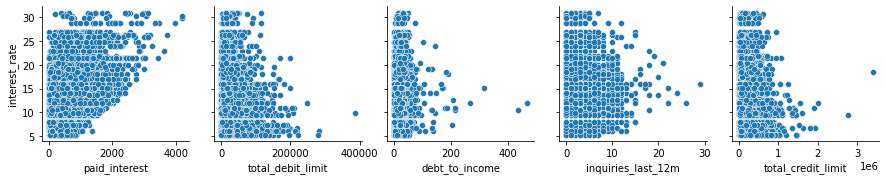

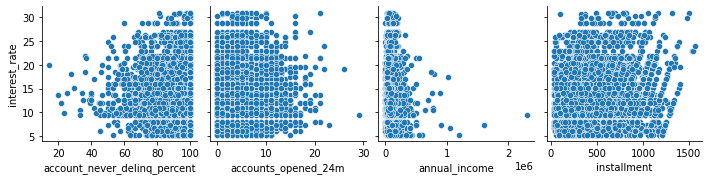

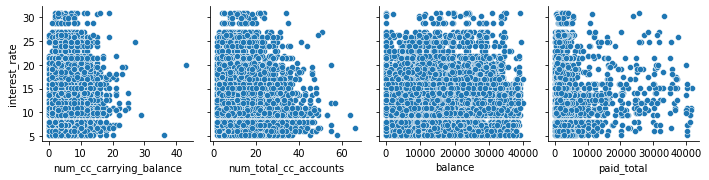

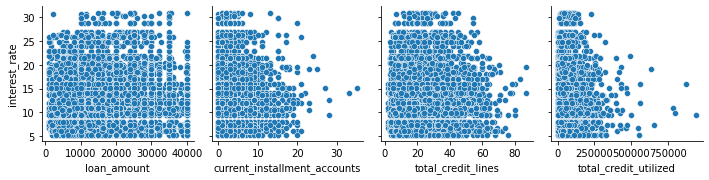

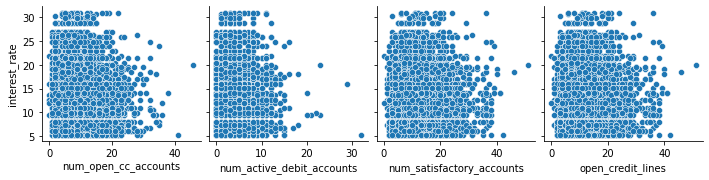

In [292]:
cols_to_select = viz_continuous[:6]['Colname']
pair_plt = df[cols_to_select]
sns.pairplot(pair_plt,x_vars = pair_plt.columns[1:],y_vars=['interest_rate'])
pair_p(6,10)
pair_p(10,14)
pair_p(14,18)
pair_p(18,23)


We can see that for most columns the data is uniformly distributed and there is no specific trend that you can get out of it, however there are some columns which have values concentrated to the lower side of their scale and might have the distribution polluted because of the outliers

<AxesSubplot:xlabel='annual_income'>

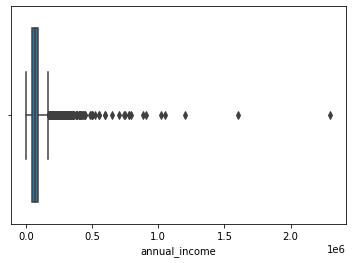

In [293]:
sns.boxplot(x=(df['annual_income']))

There are a lot of outliers in the annual income column and thus we can drop that column to have cleaner data. We can also see that columns like total_credit_limit and total_debit_limit also have some outliers but because of high correlation with the data we can avoid dropping that

In [294]:
df.drop(columns = ['annual_income'],inplace=True)

In [295]:
viz_continuous

,Colname,interest_rate
0,interest_rate,1.000000
1,paid_interest,0.514508
2,total_debit_limit,-0.254225
3,debt_to_income,0.141393
4,inquiries_last_12m,0.131193
5,total_credit_limit,-0.130497
6,account_never_delinq_percent,-0.124702
7,accounts_opened_24m,0.120657
8,annual_income,-0.099584
9,installment,0.098811


In [296]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [297]:

df_obj_viz = pd.concat([df_obj,df['interest_rate']],axis=1)
df_obj_viz.head()

,emp_length,state,homeownership,verified_income,earliest_credit_line,num_mort_accounts,loan_purpose,application_type,term,grade,loan_status,initial_listing_status,disbursement_method,interest_rate
0,3.0,NJ,MORTGAGE,Verified,2001,1,moving,individual,60,C,Current,whole,Cash,14.07
1,10.0,HI,RENT,Not Verified,1996,0,debt_consolidation,individual,36,C,Current,whole,Cash,12.61
2,3.0,WI,RENT,Source Verified,2006,0,other,individual,36,D,Current,fractional,Cash,17.09
3,1.0,PA,RENT,Not Verified,2007,0,debt_consolidation,individual,36,A,Current,whole,Cash,6.72
4,10.0,CA,RENT,Verified,2008,0,credit_card,joint,36,C,Current,whole,Cash,14.07


In [298]:
# sns.pairplot(df_obj_viz, y_vars = ['interest_rate'],x_vars=df_obj_viz.columns[-5:-1])

In [299]:
def catplot(colname,siz,title,x,y,r):
    res = sns.catplot(y="interest_rate", x=colname, data=df_obj_viz, size=siz, aspect =2)
    plt.xlabel('',labelpad = 20)
    plt.ylabel('',labelpad = 30)
    plt.title(title, size = 30)
    #plt.xticks(size=30, rotation=20)
    res.set_xticklabels(fontsize = 20, rotation = r)
    res.set_yticklabels(fontsize = 20)
    res.set_xlabels(x,fontsize=30)
    res.set_ylabels(y,fontsize=30)
    return res

The following is the plot of loan status and interest rate and we can see that most clients come in the current or fully paid sections of the loan status. The charged off category contains the lowest amount of clients

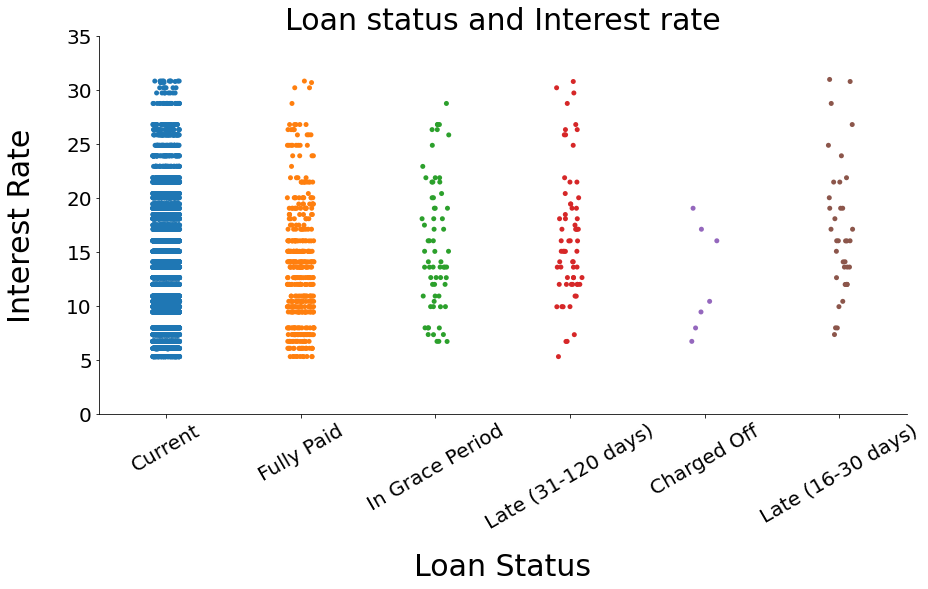

In [300]:
catplot('loan_status',6,'Loan status and Interest rate','Loan Status','Interest Rate',30)

This is the Home Ownership vs Interest rate graph and we can see that most clients have their homes mortgaged or rented and there are less clients that actually own homes

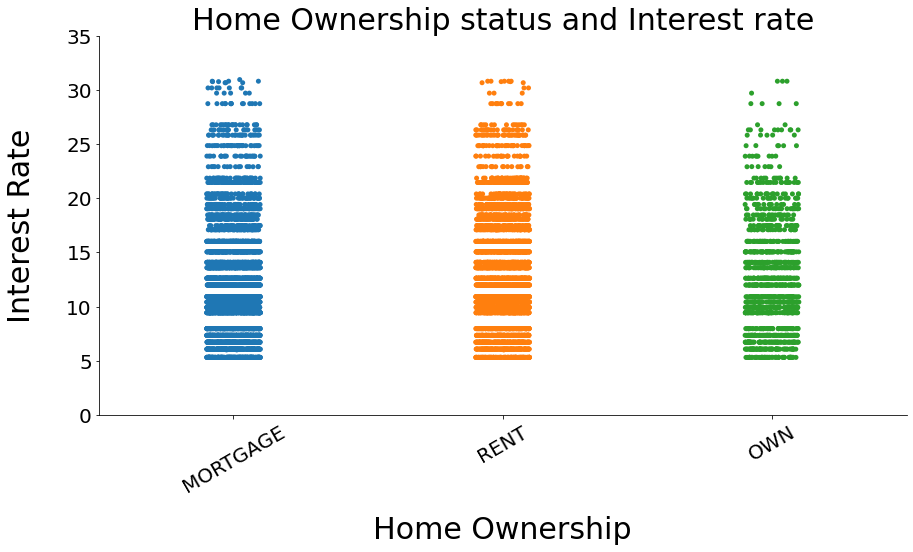

In [302]:
catplot('homeownership',6,'Home Ownership status and Interest rate','Home Ownership','Interest Rate',30)

This is the Number of mortgaged accounts vs Interest rate graph and we can see that most clients lie in the section where they have less than 6 mortgaged accounts and as the number of mortgaged accounts increase concentration of clients moves towards the lower interest rate.

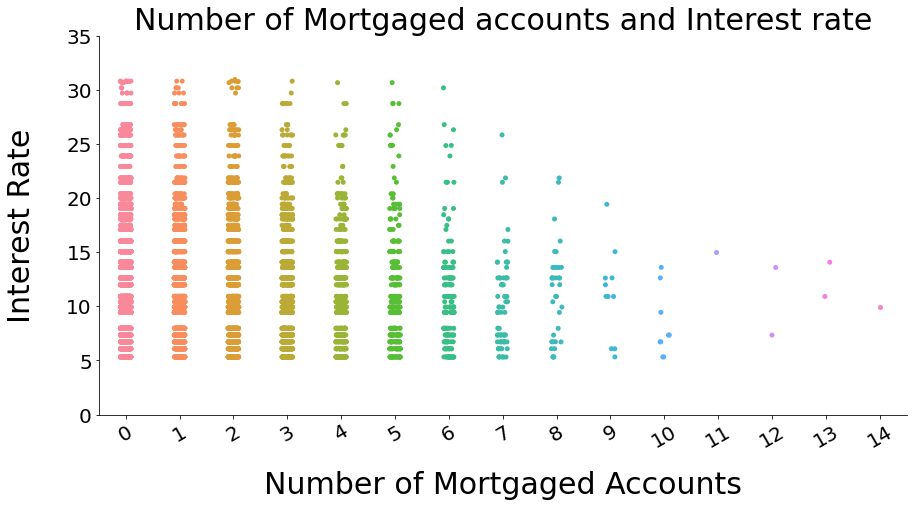

In [313]:
catplot('num_mort_accounts',6,'Number of Mortgaged accounts and Interest rate','Number of Mortgaged Accounts','Interest Rate',30)

The graph below shows that there are lower clients with their early credit lines in and around 1995 and below. The club has most clients that have their earliest credit lines after 1994.

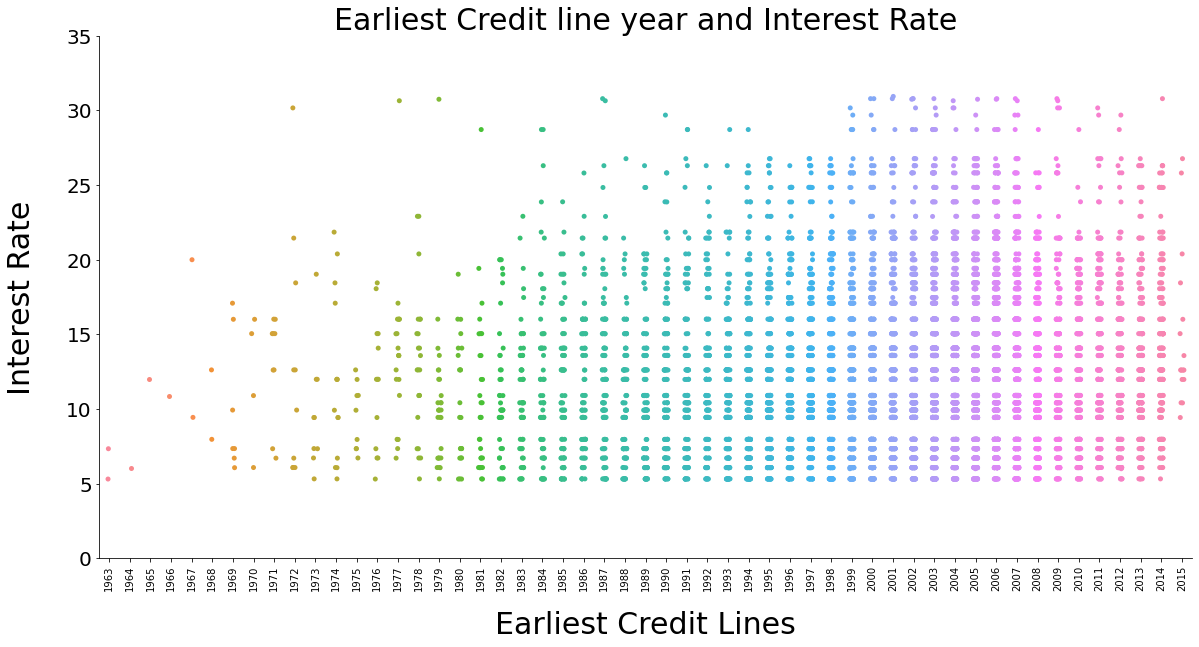

In [314]:
df_ecl = df_obj_viz[['earliest_credit_line','interest_rate']]
df_ecl = df_ecl.sort_values('earliest_credit_line')
res = sns.catplot(y="interest_rate", x='earliest_credit_line', data=df_ecl, size=8, aspect =2)
plt.xlabel('',labelpad = 20)
plt.ylabel('',labelpad = 30)
plt.title('Earliest Credit line year and Interest Rate', size = 30)
#plt.xticks(size=30, rotation=20)
res.set_xticklabels(fontsize = 10, rotation = 90)
res.set_yticklabels(fontsize = 20)
res.set_xlabels('Earliest Credit Lines',fontsize=30)
res.set_ylabels('Interest Rate',fontsize=30)

The graph below shows that the most clients are concentrated in the D grade and the interest rate lies between 25 to 23 percent. Also it is pretty evident that as teh grade scale increases, the interest rate increase and the number of clients after the D grade scale are pretty low

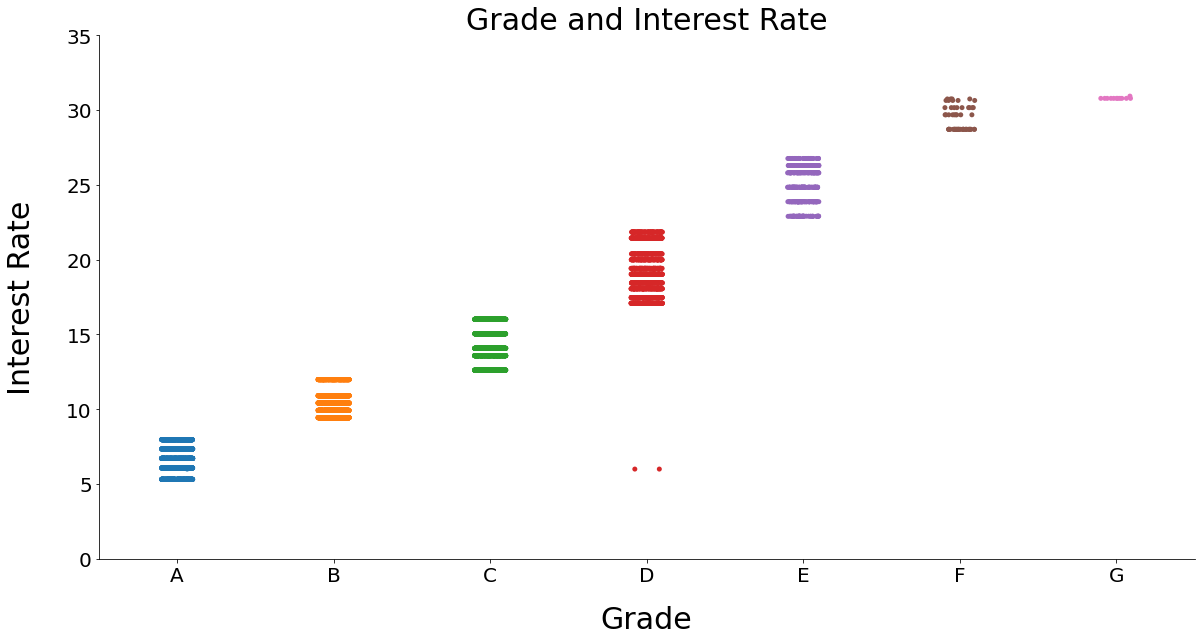

In [315]:
df_grade = df_obj_viz[['grade','interest_rate']]
df_grade = df_grade.sort_values('grade')
res = sns.catplot(y="interest_rate", x='grade', data=df_grade, size=8, aspect =2)
plt.xlabel('',labelpad = 20)
plt.ylabel('',labelpad = 30)
plt.title('Grade and Interest Rate', size = 30)
#plt.xticks(size=30, rotation=20)
res.set_xticklabels(fontsize = 20)
res.set_yticklabels(fontsize = 20)
res.set_xlabels('Grade',fontsize=30)
res.set_ylabels('Interest Rate',fontsize=30)


## Model Building


In [316]:
df_obj= pd.get_dummies(df_obj)
Final_df= pd.concat([df_num, df_obj], axis=1)

In [317]:
Final_df.head()

,debt_to_income,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_active_debit_accounts,...,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_fractional,initial_listing_status_whole,disbursement_method_Cash,disbursement_method_DirectPay
0,18.01,6,28,10,70795,38767,2,5,10,2,...,0,1,0,0,0,0,0,1,1,0
1,5.04,1,30,14,28800,4321,0,11,14,3,...,0,1,0,0,0,0,0,1,1,0
2,21.15,4,31,10,24193,16000,1,13,10,3,...,0,1,0,0,0,0,1,0,1,0
3,10.16,0,4,4,25400,4997,1,1,4,2,...,0,1,0,0,0,0,0,1,1,0
4,57.96,7,22,16,69839,52722,1,6,16,10,...,0,1,0,0,0,0,0,1,1,0


In [318]:
X=Final_df.drop('interest_rate',axis=1)
y=Final_df['interest_rate']

In [319]:
# polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
# poly_features=polynomial_converter.fit(X)
# poly_features=polynomial_converter.transform(X)

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [321]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [322]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

Here we will fit different Regression models and consider Mean Absolute Error to be the metric of the model

In [323]:
models = []

Lasso Regressor

In [324]:
model_lasso = Lasso(alpha=.01)
model_lasso.fit(X_train, y_train)
mae = mean_absolute_error(y_test , model_lasso.predict(X_test))
models.append(['Lasso Regression', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.8586501898044117


Ridge Regressor

In [325]:
model_ridge = Ridge(alpha=10)


model_ridge.fit(X_train, y_train)
mae = mean_absolute_error(y_test , model_ridge.predict(X_test))
models.append(['Ridge Regression', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.8517890611815832


Random Forest Regressor

In [326]:
regr = RandomForestRegressor(max_depth=30)
regr.fit(X_train, y_train)
mae = mean_absolute_error(y_test , regr.predict(X_test))
models.append(['RandomForestRegressor', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.7743891821472159


Support Vector Regressor

In [327]:
regr_svr = SVR(C=1.0, epsilon=0.2, kernel = 'rbf')
regr_svr.fit(X_train, y_train)
mae = mean_absolute_error(y_test , regr_svr.predict(X_test))
models.append(['Support Vector Regressor', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.4356988677264275


Adaboost Regressor

In [328]:
regr = AdaBoostRegressor(random_state=42, n_estimators=90)
regr.fit(X_train, y_train)
mae = mean_absolute_error(y_test , regr.predict(X_test))
models.append(['AdaBoostRegressor', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 1.3432905616345594


Gradient Boosting Regressor

In [329]:
regr = GradientBoostingRegressor(random_state=42, n_estimators=3500)
regr.fit(X_train, y_train)
mae = mean_absolute_error(y_test , regr.predict(X_test))
models.append(['GradientBoostingRegressor', mae])
print('Mean Absolute Error:',mae)

Mean Absolute Error: 0.5292783037723403


In [330]:
models = pd.DataFrame(models, columns=['Regression Models','Mean Absolute Error']).sort_values(by='Mean Absolute Error')

In [331]:
models

,Regression Models,Mean Absolute Error
5,GradientBoostingRegressor,0.529278
2,RandomForestRegressor,0.774389
1,Ridge Regression,0.851789
0,Lasso Regression,0.858650
4,AdaBoostRegressor,1.343291
3,Support Vector Regressor,1.435699


<AxesSubplot:xlabel='Regression Models'>

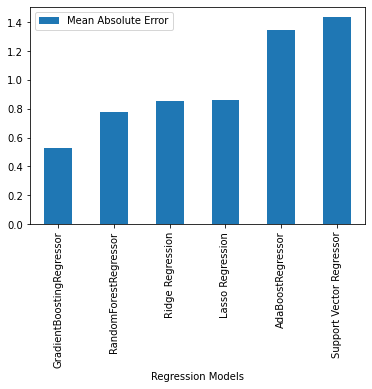

In [332]:
models.plot(x = 'Regression Models',kind='bar')

Here we got Gradient Boosting Regressor as the winner for having the minimum mean absolute error of 0.5292 and thus this is the best model here.

There are some stronger models that can be used here with greater computational power and more number of records.
One of the prominent and the fastest regression models is LightGBM which is considered to be almost 10x faster than XgBoost algorithm and also fits the data well. We can also consider using a neural networks for regression as with neural network the models will by themselves be able to learn new patterns and features in data. Over time deep learning models prve to be the real assets as there is not much changes that one has to make if the initial model itself is set correctly.

** Some primary assumptions made here are that NaN values do not hold values at all and are considered to be a missing value because of some data discrepency.